In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import editdistance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [60]:
AAV2_WT="MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLVLPGYKYLGPFNGLD\
KGEPVNEADAAALEHDKAYDRQLDSGDNPYLKYNHADAEFQERLKEDTSFGGNLGRAVFQ\
AKKRVLEPLGLVEEPVKTAPGKKRPVEHSPVEPDSSSGTGKAGQQPARKRLNFGQTGDAD\
SVPDPQPLGQPPAAPSGLGTNTMATGSGAPMADNNEGADGVGNSSGNWHCDSTWMGDRVI\
TTSTRTWALPTYNNHLYKQISSQSGASNDNHYFGYSTPWGYFDFNRFHCHFSPRDWQRLI\
NNNWGFRPKRLNFKLFNIQVKEVTQNDGTTTIANNLTSTVQVFTDSEYQLPYVLGSAHQG\
CLPPFPADVFMVPQYGYLTLNNGSQAVGRSSFYCLEYFPSQMLRTGNNFTFSYTFEDVPF\
HSSYAHSQSLDRLMNPLIDQYLYYLSRTNTPSGTTTQSRLQFSQAGASDIRDQSRNWLPG\
PCYRQQRVSKTSADNNNSEYSWTGATKYHLNGRDSLVNPGPAMASHKDDEEKFFPQSGVL\
IFGKQGSEKTNVDIEKVMITDEEEIRTTNPVATEQYGSVSTNLQRGNRQAATADVNTQGV\
LPGMVWQDRDVYLQGPIWAKIPHTDGHFHPSPLMGGFGLKHPPPQILIKNTPVPANPSTT\
FSAAKFASFITQYSTGQVSVEIEWELQKENSKRWNPEIQYTSNYNKSVNVDFTVDTNGVY\
SEPRPIGTRYLTRNL"

In [61]:
import sys

In [110]:
sys.path.append("../")
from models.Ground_truth_oracles.Additive_models import Additive_landscape_constructor


In [111]:
cons=Additive_landscape_constructor()

In [112]:
cons.load_landscapes(landscapes_to_test=["liver"])

In [113]:
landscape_gen=cons.generate_from_loaded_landscapes()

In [114]:
cons.loaded_landscapes

{'liver:450:540:0': {'phenotype': 'liver',
  'start': 450,
  'end': 540,
  'noise': 0},
 'liver:450:540:0.01': {'phenotype': 'liver',
  'start': 450,
  'end': 540,
  'noise': 0.01},
 'liver:450:540:0.1': {'phenotype': 'liver',
  'start': 450,
  'end': 540,
  'noise': 0.1}}

In [115]:
x=next(landscape_gen)

In [116]:
landscape_x=x["landscape_oracle"]

In [117]:
x

{'landscape_id': 'liver:450:540:0',
 'starting_seqs': {'AAV2:450-540': 'PSGTTTQSRLQFSQAGASDIRDQSRNWLPGPCYRQQRVSKTSADNNNSEYSWTGATKYHLNGRDSLVNPGPAMASHKDDEEKFFPQSGVL'},
 'landscape_oracle': <models.Ground_truth_oracles.Additive_models.Additive_landscape_AAV at 0x1a36533208>}

In [118]:
landscape_x.top_seq

'PAGTTVTPMNWFSQPGCIHLKNQGKQWMPGPIQRQNRVSKCAMDNHQMEYSWTGACKYHLNGRDSIISPGIPMTHSQDDEEIFFPQSGVL'

In [77]:
landscape_x.get_fitness(x['starting_seqs'][0])

0.5

In [44]:
landscape_x._get_raw_fitness(landscape_x.top_seq)

47.871582973321054

In [45]:
landscape1=landscape_x

In [4]:
with open('../data/AAV_Additive_landscapes/AAV2_single_subs.json','r') as infile:
    dataj=json.load(infile)

In [5]:
phenotypes=['log2_lung_v_wt','log2_packaging_v_wt','log2_liver_v_wt',\
            'log2_kidney_v_wt','log2_spleen_v_wt','log2_heart_v_wt', 'log2_blood_v_wt']

In [6]:
len(AAV2_WT)

735

In [10]:
phenotypes=["heart","lung","kidney","liver","blood","spleen"]
noise=[0,0.01,0.1]
start_ends=[(560,588),(450,540),(450,735),(0,735)]
output_dict={}
for se in start_ends:        
    for n in noise:
        for phenotype in phenotypes:
            key=f'{phenotype}:{se[0]}:{se[1]}:{n}'
            output_dict[key]={'phenotype':phenotype, 'start':se[0],'end':se[1],'noise':n}
        

{'heart:560:588:0': {'phenotype': 'heart',
  'start': 560,
  'end': 588,
  'noise': 0},
 'lung:560:588:0': {'phenotype': 'lung', 'start': 560, 'end': 588, 'noise': 0},
 'kidney:560:588:0': {'phenotype': 'kidney',
  'start': 560,
  'end': 588,
  'noise': 0},
 'liver:560:588:0': {'phenotype': 'liver',
  'start': 560,
  'end': 588,
  'noise': 0},
 'blood:560:588:0': {'phenotype': 'blood',
  'start': 560,
  'end': 588,
  'noise': 0},
 'spleen:560:588:0': {'phenotype': 'spleen',
  'start': 560,
  'end': 588,
  'noise': 0},
 'heart:560:588:0.01': {'phenotype': 'heart',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'lung:560:588:0.01': {'phenotype': 'lung',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'kidney:560:588:0.01': {'phenotype': 'kidney',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'liver:560:588:0.01': {'phenotype': 'liver',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'blood:560:588:0.01': {'phenotype': 'blood',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'sple

In [11]:
with open('../data/AAV_Additive_landscapes/landscapes.json', 'w') as outfile:
    json.dump(output_dict, outfile,indent=4)

In [94]:
import sys

sys.path.append('../')


            

In [340]:
from models.Ground_truth_oracles.Additive_models import Additive_landscape_AAV

In [496]:
st=450
end=750

In [497]:
landscape1=Additive_landscape_AAV('../data/AAV_Additive_landscapes/AAV2_single_subs.json','liver',0,1, start=st, end=end)

In [498]:
landscape1.top_seq

'PAGTTVTPMNWFSQPGCIHLKNQGKQWMPGPIQRQNRVSKCAMDNHQMEYSWTGACKYHLNGRDSIISPGIPMTHSQDDEEIFFPQSGVLHFGEMDTTMDNADCETVQICCEMEIVQTNCVSTEPWGEVASNIQRGNRQPQTEDVNAIGVIPGMVWMDRDVYLAGPIWARIPQVAGYCKPSPLAGGFGCCDPPYVIFIKNTSVPANPHLWFFDSYMKQWITQYSTGCITVCVTWECLKENSKRWNPFVQFTNNYYKSWWVDFTVDHNGMYAEPRPIGTRWLTRPI'

In [499]:
landscape1.get_fitness(landscape1.top_seq)

1.0

In [500]:
landscape1.top_seq

'PAGTTVTPMNWFSQPGCIHLKNQGKQWMPGPIQRQNRVSKCAMDNHQMEYSWTGACKYHLNGRDSIISPGIPMTHSQDDEEIFFPQSGVLHFGEMDTTMDNADCETVQICCEMEIVQTNCVSTEPWGEVASNIQRGNRQPQTEDVNAIGVIPGMVWMDRDVYLAGPIWARIPQVAGYCKPSPLAGGFGCCDPPYVIFIKNTSVPANPHLWFFDSYMKQWITQYSTGCITVCVTWECLKENSKRWNPFVQFTNNYYKSWWVDFTVDHNGMYAEPRPIGTRWLTRPI'

In [501]:
landscape1.max_possible

60.56711578885409

In [502]:
landscape1._get_raw_fitness(landscape1.top_seq)

121.13423157770818

In [46]:
from utils.sequence_utils import *

In [47]:
mutants=list(set([generate_random_mutant(landscape1.top_seq,0.005, alphabet=AAS) for i in range(10000)]))

In [48]:
landscape1.get_fitness(mutants[5])

0

In [49]:
fitnesses=[]
distances=[]
for m in mutants:
   fitnesses.append(landscape1.get_fitness(m))
   distances.append(editdistance.eval(landscape1.top_seq, m))

In [50]:
len(fitnesses)

2082

(array([396.,   0.,   0.,   0.,   0.,  31.,  28., 448., 192., 987.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

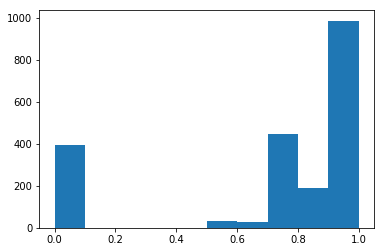

In [51]:
plt.hist(fitnesses)

(array([1.000e+00, 0.000e+00, 1.378e+03, 0.000e+00, 0.000e+00, 6.330e+02,
        0.000e+00, 5.700e+01, 0.000e+00, 1.300e+01]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

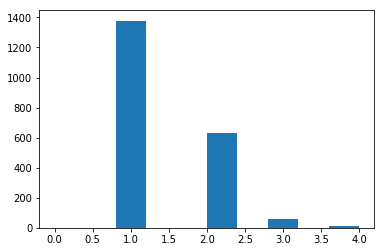

In [52]:
plt.hist(distances)

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


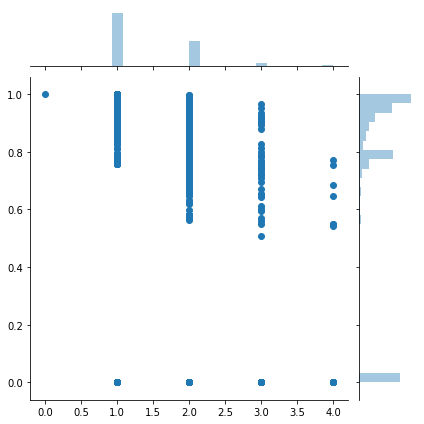

In [53]:
sns.jointplot(distances,fitnesses)

In [57]:
from explorers.elitist_explorers import Greedy
from explorers.evolutionary_explorers import WF, ML_WF


In [58]:
greedy_exp= Greedy(recomb_rate=0.2, threshold=0.2, mu=1, virtual_screen=20,alphabet=AAS, path='../simulations/')


In [513]:
random_exp = Random_explorer(mu=0.01,path='../simulations/')

In [514]:
start_seq=AAV2_WT[st:end]


In [515]:
from models.Noisy_models.Noisy_abstract_model import Noisy_abstract_model

noisy_landscape = Noisy_abstract_model(landscape1,signal_strength=1)

noisy_landscape.reset([start_seq])
random_exp.set_model(noisy_landscape)
random_exp.run(10,overwrite=False) 


round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 100, top: 0.5072529983392513
round: 2, cost: 201, evals: 200, top: 0.5072529983392513
round: 3, cost: 301, evals: 300, top: 0.5072529983392513
round: 4, cost: 401, evals: 400, top: 0.5072529983392513
round: 5, cost: 501, evals: 500, top: 0.5072529983392513
round: 6, cost: 601, evals: 600, top: 0.5072529983392513
round: 7, cost: 701, evals: 700, top: 0.5072529983392513
round: 8, cost: 801, evals: 800, top: 0.5072529983392513
round: 9, cost: 901, evals: 900, top: 0.5072529983392513


/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


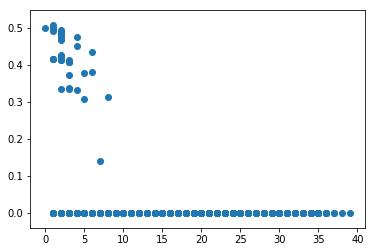

In [516]:
fitnesses=[]
distances=[]
for seq in noisy_landscape.measured_sequences:
    fitnesses.append(noisy_landscape.measured_sequences[seq])
    distances.append(editdistance.eval(AAV2_WT[st:end],seq))
plt.scatter(distances,fitnesses)

In [522]:

noisy_landscape = Noisy_abstract_model(landscape1,signal_strength=0.9)

noisy_landscape.reset([start_seq])
greedy_exp.set_model(noisy_landscape)
greedy_exp.run(30,overwrite=False) 

round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 2048, top: 0.5036122402586988
round: 2, cost: 201, evals: 4515, top: 0.5081386111012771
round: 3, cost: 301, evals: 7109, top: 0.5146777359037529
round: 4, cost: 401, evals: 9915, top: 0.5158981024329686
round: 5, cost: 501, evals: 12805, top: 0.5158981024329686
round: 6, cost: 601, evals: 15680, top: 0.5158981024329686
round: 7, cost: 701, evals: 18559, top: 0.5158981024329686
round: 8, cost: 801, evals: 21396, top: 0.5158981024329686
round: 9, cost: 901, evals: 24239, top: 0.5158981024329686
round: 10, cost: 1001, evals: 27133, top: 0.5158981024329686
round: 11, cost: 1101, evals: 29924, top: 0.5158981024329686
round: 12, cost: 1201, evals: 32703, top: 0.5158981024329686
round: 13, cost: 1301, evals: 35468, top: 0.5158981024329686
round: 14, cost: 1401, evals: 38250, top: 0.5158981024329686
round: 15, cost: 1501, evals: 41033, top: 0.5158981024329686
round: 16, cost: 1601, evals: 43765, top: 0.5158981024329686
round: 1

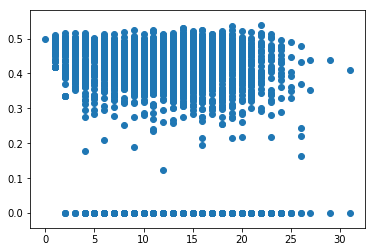

In [523]:
fitnesses=[]
distances=[]
for seq in noisy_landscape.measured_sequences:
    fitnesses.append(noisy_landscape.measured_sequences[seq])
    distances.append(editdistance.eval(AAV2_WT[st:end],seq))
plt.scatter(distances,fitnesses)

In [519]:
nnlandscapes = []
from utils.model_architectures import SKLinear,SKRF, NLNN, CNNa, Linear
from models.Noisy_models.Neural_network_models import NN_model

for arch in [SKLinear, Linear, SKRF, NLNN, CNNa]:
    nn_model = arch(len(start_seq), alphabet = greedy_exp.alphabet)
    nnlandscape = NN_model(landscape1,nn_model)
    print(nn_model.architecture_name)
    nnlandscape.update_model([start_seq])

    greedy_exp.set_model(nnlandscape)
    greedy_exp.run(10,overwrite=False) 

SKLinear
round: 0, cost: 1, evals: 0, top: 0.5


/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


round: 1, cost: 101, evals: 2018, top: 0.5079579080588105
round: 2, cost: 201, evals: 4426, top: 0.5079579080588105
round: 3, cost: 301, evals: 7056, top: 0.5168927220817608
round: 4, cost: 401, evals: 9887, top: 0.5168927220817608
round: 5, cost: 501, evals: 12810, top: 0.5168927220817608
round: 6, cost: 601, evals: 15817, top: 0.5168927220817608
round: 7, cost: 701, evals: 18716, top: 0.5168927220817608
round: 8, cost: 801, evals: 21590, top: 0.5168927220817608
round: 9, cost: 901, evals: 24505, top: 0.5168927220817608
LNN
round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 2049, top: 0.5062539140127836
round: 2, cost: 201, evals: 4368, top: 0.5062539140127836
round: 3, cost: 301, evals: 7004, top: 0.5062539140127836
round: 4, cost: 401, evals: 9685, top: 0.5062539140127836
round: 5, cost: 501, evals: 12388, top: 0.5062539140127836
round: 6, cost: 601, evals: 15071, top: 0.5062539140127836
round: 7, cost: 701, evals: 17801, top: 0.5062539140127836
round: 8, cost: 801, e

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


round: 1, cost: 101, evals: 2024, top: 0.5151165420705299
round: 2, cost: 201, evals: 4492, top: 0.5151165420705299
round: 3, cost: 301, evals: 7272, top: 0.5151165420705299
round: 4, cost: 401, evals: 9983, top: 0.5151165420705299
round: 5, cost: 501, evals: 12604, top: 0.5151165420705299
round: 6, cost: 601, evals: 15263, top: 0.5151165420705299
round: 7, cost: 701, evals: 17900, top: 0.5151165420705299
round: 8, cost: 801, evals: 20564, top: 0.521151840234825
round: 9, cost: 901, evals: 23369, top: 0.521151840234825
NLNN_hd50


/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 2012, top: 0.5069215012837934
round: 2, cost: 201, evals: 4325, top: 0.5069215012837934
round: 3, cost: 301, evals: 6915, top: 0.5069215012837934
round: 4, cost: 401, evals: 9640, top: 0.5069215012837934
round: 5, cost: 501, evals: 12350, top: 0.5069215012837934
round: 6, cost: 601, evals: 15052, top: 0.5069215012837934
round: 7, cost: 701, evals: 17833, top: 0.5069215012837934
round: 8, cost: 801, evals: 20492, top: 0.5069215012837934
round: 9, cost: 901, evals: 23229, top: 0.5069215012837934
CNNa_hd100_f50
round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 2036, top: 0.5029268284542584
round: 2, cost: 201, evals: 4286, top: 0.5029268284542584
round: 3, cost: 301, evals: 6836, top: 0.5029268284542584
round: 4, cost: 401, evals: 9524, top: 0.5029268284542584
round: 5, cost: 501, evals: 12186, top: 0.5029268284542584
round: 6, cost: 601, evals: 14954, top: 0.5029268284542584
round: 7, cost: 701, evals: 1771

In [520]:
fitnesses=[]
distances=[]
for seq in nnlandscape.measured_sequences:
    fitnesses.append(nnlandscape.measured_sequences[seq])
    distances.append(editdistance.eval(AAV2_WT[st:end],seq))

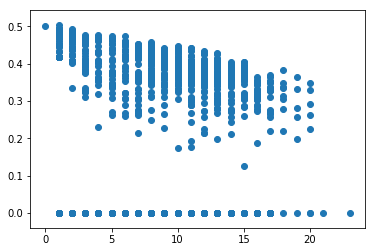

In [521]:
plt.scatter(distances,fitnesses)

In [119]:
%autoreload 2
import sys

sys.path.append("../")


from evaluators.Evaluator import Evaluator
from explorers.elitist_explorers import Greedy
LANDSCAPE_TYPES_Additive = {"Additive": ["heart","liver","lung","blood","kidney","spleen"]}


In [120]:
bo_explorer_prod = Greedy(virtual_screen=20, alphabet=AAS)
bo_explorer_prod.debug = False
evaluator_bo = Evaluator(
    bo_explorer_prod,
    landscape_types=LANDSCAPE_TYPES_GFP,
    path="../simulations/Protein/eval_Additive/",
)

loading landscapes RNA: None, TF: None, Protein: None, GFP: None, Additive: ['heart', 'liver']
Loading complete.


In [121]:
evaluator_bo.evaluate_for_landscapes(evaluator_bo.consistency_robustness_independence, num_starts=3)

Running on heart:450:540:0
start seq AAV2:450-540
Evaluating for signal_strength: 0
Running  NAM {'landscape_id': 'heart:450:540:0', 'start_id': 'AAV2:450-540', 'signal_strength': 0}
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
round: 0, cost: 1, evals: 0.0, top: 0.5
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
round: 1, cost: 101, evals: 2003.0, top: 0.5
[0.01731151654889208, 0.7637959229234047, 0.21889256052770317]
round: 2, cost: 201, evals: 4036.0, top: 0.5053879726511574
[0.1937352831929907, 0.4880870741346386, 0.3181776426723707]
round: 3, cost: 301, evals: 6092.0, top: 0.5219518542339199
[0.5677745365755754, 0.2628733353937764, 0.1693521280306481]
round: 4, cost: 401, evals: 8121.0, top: 0.5437802440636462
[0.6138775572699307, 0.365042739770643, 0.021079702959426298]
round: 5, cost: 501, evals: 10136.0, top: 0.5501163123325434
[0.465211879600184, 0.053448695747598224, 0.4813394246522178]
round: 6, cost: 601, evals: 12180.0, top: 0.5501163123325434

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
round: 0, cost: 1, evals: 0.0, top: 0.5
[0.44755534438276273, 0.06926525475382053, 0.48317940086341676]
round: 1, cost: 101, evals: 2025.0, top: 0.5217466896355893
[0.3757583074350821, 0.2632890853764647, 0.3609526071884532]
round: 2, cost: 201, evals: 4052.0, top: 0.5304477883634945
[0.47068609086861635, 0.04672652534619822, 0.48258738378518545]
round: 3, cost: 301, evals: 6062.0, top: 0.53574605091637
[0.40885630454839234, 0.5805031513441973, 0.01064054410741043]
round: 4, cost: 401, evals: 8085.0, top: 0.53574605091637
[0.4460070986611989, 0.011276556688766714, 0.5427163446500343]
round: 5, cost: 501, evals: 10092.0, top: 0.53574605091637
[0.13640128192549525, 0.13640128192549525, 0.7271974361490096]
round: 6, cost: 601, evals: 12114.0, top: 0.5496236121648205
[0.4879076291985352, 0.01380742900023224, 0.4982849418012326]
round: 7, cost: 701, evals: 14120.0, top: 0.5526452230897945
[0.1585764237798603, 0.04476375996330248, 

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Running NN {'landscape_id': 'liver:450:540:0', 'start_id': 'AAV2:450-540'}
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
round: 0, cost: 1, evals: 0.0, top: 0.5
[0.5699675941355984, 0.06665787091843965, 0.36337453494596195]
round: 1, cost: 101, evals: 2011.0, top: 0.5241601953768473
[0.3841845468020044, 0.5241114634794034, 0.09170398971859223]
round: 2, cost: 201, evals: 4017.0, top: 0.529587914418017
[0.15669199015820395, 0.5649077898457628, 0.27840021999603315]
round: 3, cost: 301, evals: 6062.0, top: 0.529587914418017
[0.08459386379498485, 0.6400618722187693, 0.2753442639862458]
round: 4, cost: 401, evals: 8104.0, top: 0.529587914418017
[0.048535681289126206, 0.6089895556392011, 0.3424747630716727]
round: 5, cost: 501, evals: 10117.0, top: 0.529587914418017
[0.12080279738939921, 0.41104621090340904, 0.46815099170719177]
round: 6, cost: 601, evals: 12124.0, top: 0.529587914418017
[0.2614452598703149, 0.683335

[0.24241196628010606, 0.4936360538691146, 0.26395197985077945]
round: 9, cost: 901, evals: 18303.0, top: 0.6747509942701155
[0.41710503483035943, 0.13142895190079154, 0.451466013268849]
Running NN {'landscape_id': 'heart:450:540:0.01', 'start_id': 'AAV2:450-540'}
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
round: 0, cost: 1, evals: 0.0, top: 0.5167414672125303
[0.9450212564421431, 0.019516814882468404, 0.035461928675388575]
round: 1, cost: 101, evals: 2003.0, top: 0.5306871378236385
[0.34791348733104827, 0.524275787272367, 0.12781072539658475]
round: 2, cost: 201, evals: 4014.0, top: 0.5342971476240692
[0.15711203402482166, 0.7887798752137909, 0.05410809076138737]
round: 3, cost: 301, evals: 6037.0, top: 0.5382097707528637
[0.3526790932486991, 0.3236604533756504, 0.3236604533756504]
round: 4, cost: 401, evals: 8082.0, top: 0.5473077770987261
[0.3839409445585839, 0.32067649479332055, 0.29538256064809554]
round: 5, cost: 501, evals: 10127.0, top: 0.5473077770987261
[0.10

[0.32586103594804877, 0.314333172576491, 0.3598057914754601]
round: 7, cost: 701, evals: 14213.0, top: 0.7027872889043028
[0.2982952552304284, 0.3758692331343007, 0.3258355116352708]
round: 8, cost: 801, evals: 16236.0, top: 0.7258146399412503
[0.5004121314526175, 0.1726440244537219, 0.3269438440936605]
round: 9, cost: 901, evals: 18281.0, top: 0.7377989895015248
[0.32338216631942035, 0.3488207871569259, 0.3277970465236539]
Running NN {'landscape_id': 'liver:450:540:0.01', 'start_id': 'AAV2:450-540'}
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
round: 0, cost: 1, evals: 0.0, top: 0.5032946463967922
[0.28635073122951243, 0.014688298083625713, 0.6989609706868617]
round: 1, cost: 101, evals: 2012.0, top: 0.5239189148339167
[0.16804899981697757, 0.149864557695302, 0.6820864424877204]
round: 2, cost: 201, evals: 4040.0, top: 0.579129010597968
[0.5437330901507942, 0.36883311060793916, 0.08743379924126664]
round: 3, cost: 301, evals: 6071.0, top: 0.6006764602347218
[0.68264209

[0.7765836799094264, 0.06757201885387935, 0.15584430123669413]
round: 5, cost: 501, evals: 10116.0, top: 0.7708842619580831
[0.012991774564458256, 0.09218212542518701, 0.8948261000103547]
round: 6, cost: 601, evals: 12120.0, top: 0.7708842619580831
[0.017411587641838762, 0.8296151671753945, 0.15297324518276667]
round: 7, cost: 701, evals: 14158.0, top: 0.7708842619580831
[0.8510210804377459, 0.07014829460746634, 0.0788306249547876]
round: 8, cost: 801, evals: 16189.0, top: 0.7708842619580831
[0.3197191430048548, 0.3982786638744767, 0.2820021931206684]
round: 9, cost: 901, evals: 18191.0, top: 0.7708842619580831
[0.024081366154568965, 0.9518372676908621, 0.024081366154568965]
Running NN {'landscape_id': 'heart:450:540:0.1', 'start_id': 'AAV2:450-540'}
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
round: 0, cost: 1, evals: 0.0, top: 0.5007046030899548
[0.15392665311437465, 0.7647443601417931, 0.08132898674383231]
round: 1, cost: 101, evals: 2028.0, top: 0.7073562042545465


[0.5744282751326554, 0.04180286930140278, 0.38376885556594187]
round: 3, cost: 301, evals: 6082.0, top: 0.8250431512171064
[0.08413884741823006, 0.3479817683044737, 0.5678793842772963]
round: 4, cost: 401, evals: 8115.0, top: 0.8250431512171064
[0.09436663967277065, 0.018702400852221152, 0.8869309594750082]
round: 5, cost: 501, evals: 10154.0, top: 0.8250431512171064
[0.3927554820951228, 0.036709524918985555, 0.5705349929858916]
round: 6, cost: 601, evals: 12178.0, top: 0.8250431512171064
[0.6106905471493006, 0.061962235536842734, 0.3273472173138566]
round: 7, cost: 701, evals: 14223.0, top: 0.8250431512171064
[0.3397307495484693, 0.143690287297203, 0.5165789631543277]
round: 8, cost: 801, evals: 16227.0, top: 0.8250431512171064
[0.22844405784899616, 0.1371387196899302, 0.6344172224610737]
round: 9, cost: 901, evals: 18231.0, top: 0.8250431512171064
[0.4909281219571611, 0.4923155033462647, 0.0167563746965741]
Running NN {'landscape_id': 'liver:450:540:0.1', 'start_id': 'AAV2:450-540'}
